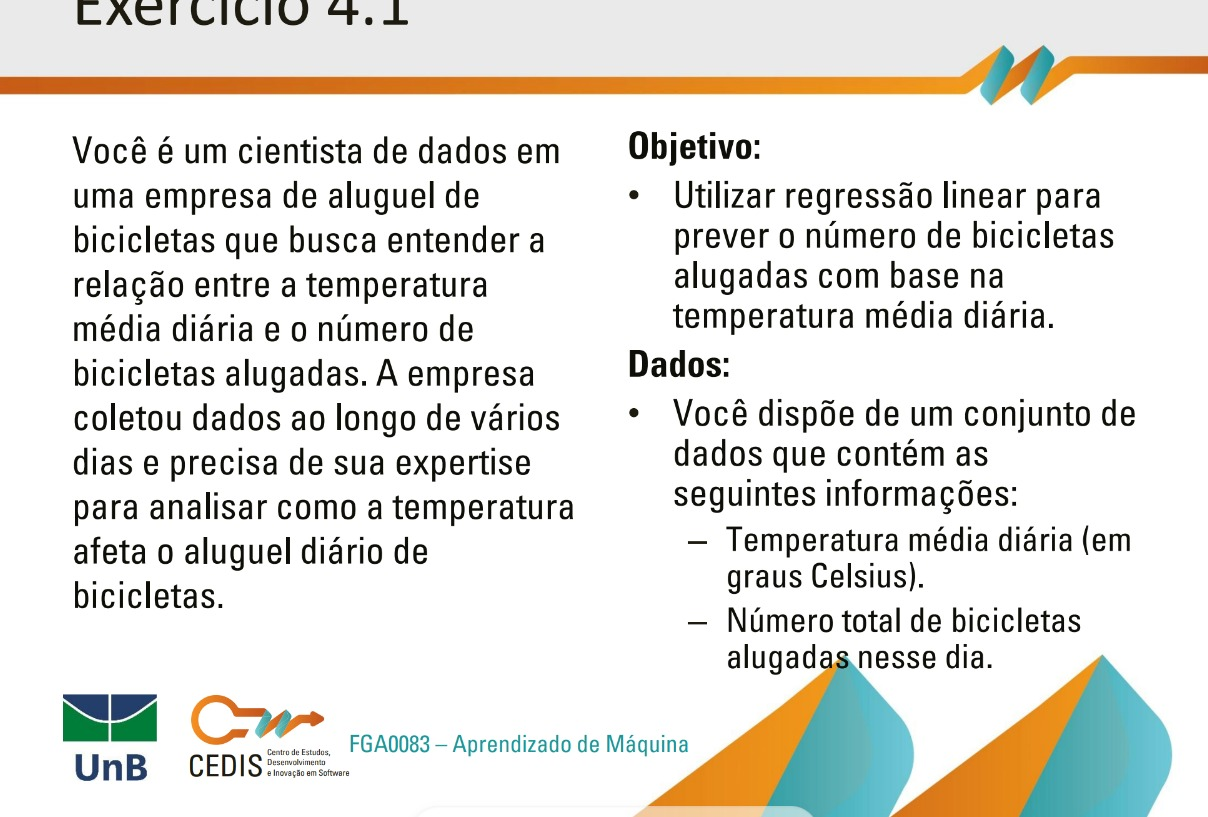

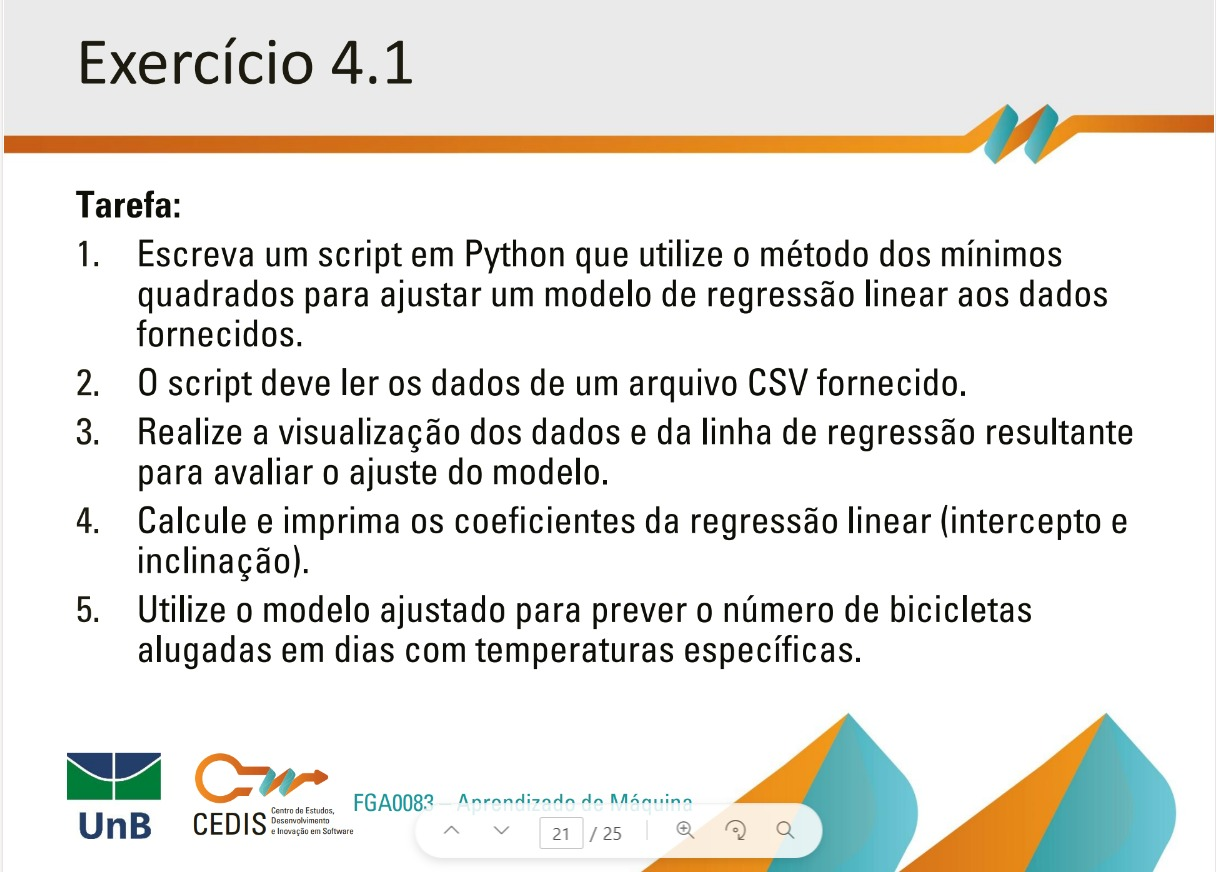

Primeiras 5 linhas do dataset após tratamento:
   temperatura  bicicletas
1    10.000000  109.934283
2    10.202020  100.265017
3    10.404040  119.014377
4    10.606061  139.551506
5    10.808081  107.438145

Resultados da regressão linear (implementação manual):
Intercepto (β0): -54.8356
Inclinação (β1): 15.1379
Coeficiente de determinação (R²): 0.9599
Erro Quadrático Médio (MSE): 325.9619


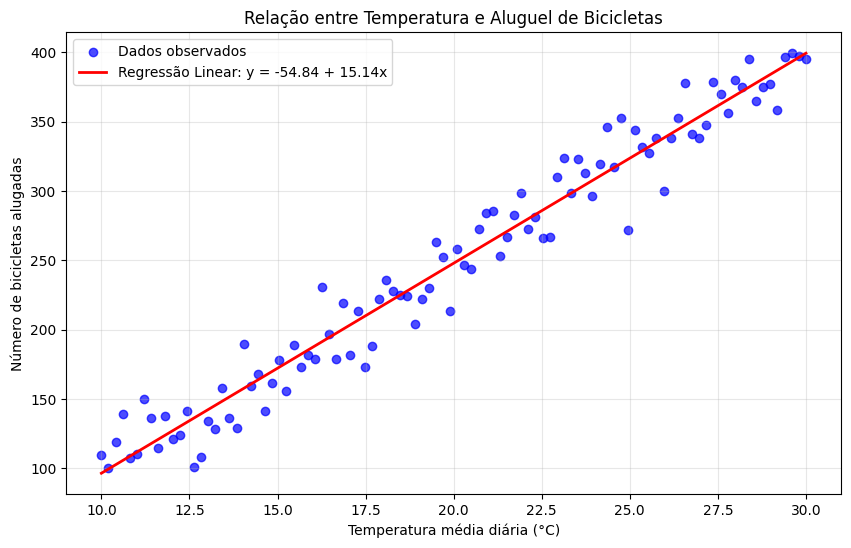


Previsões para temperaturas específicas:
Temperatura (°C) | Bicicletas Previstas
-----------------------------------
            15 | 172
            20 | 248
            25 | 324
            30 | 399
            35 | 475


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Carregar os dados do arquivo CSV
df = pd.read_csv('../data/4.1 - dados_bicicletas.csv', sep=',', header=None)
df.columns = ['temperatura', 'bicicletas']

# Remover a primeira linha que contém os nomes das colunas
df = df.iloc[1:].copy()

# Converter as colunas para valores numéricos
df['temperatura'] = pd.to_numeric(df['temperatura'])
df['bicicletas'] = pd.to_numeric(df['bicicletas'])

# Visualizando primeiras linhas para confirmar o formato
print("Primeiras 5 linhas do dataset após tratamento:")
print(df.head())

# 2. Implementar o método dos mínimos quadrados manualmente
# Preparar os dados
X = df['temperatura'].values
y = df['bicicletas'].values
n = len(X)

# Adicionar coluna de 1's para o termo de interceptação
X_matrix = np.vstack([np.ones(n), X]).T

# Calcular os coeficientes usando a fórmula dos mínimos quadrados
# (X^T X)^(-1) X^T y
XTX = np.dot(X_matrix.T, X_matrix)
XTX_inv = np.linalg.inv(XTX)
XTX_inv_XT = np.dot(XTX_inv, X_matrix.T)
beta = np.dot(XTX_inv_XT, y)

# Extrair intercepto e inclinação
intercepto = beta[0]
inclinacao = beta[1]

print(f"\nResultados da regressão linear (implementação manual):")
print(f"Intercepto (β0): {intercepto:.4f}")
print(f"Inclinação (β1): {inclinacao:.4f}")

# Calcular os valores previstos
y_pred = intercepto + inclinacao * X

# Calcular o R² manualmente
y_mean = np.mean(y)
ss_total = np.sum((y - y_mean) ** 2)
ss_residual = np.sum((y - y_pred) ** 2)
r2 = 1 - (ss_residual / ss_total)
print(f"Coeficiente de determinação (R²): {r2:.4f}")

# Calcular o Erro Quadrático Médio (MSE) manualmente
mse = np.mean((y - y_pred) ** 2)
print(f"Erro Quadrático Médio (MSE): {mse:.4f}")

# 4. Visualizar os dados e a linha de regressão
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', alpha=0.7, label='Dados observados')
plt.plot(X, y_pred, color='red', linewidth=2, label=f'Regressão Linear: y = {intercepto:.2f} + {inclinacao:.2f}x')
plt.xlabel('Temperatura média diária (°C)')
plt.ylabel('Número de bicicletas alugadas')
plt.title('Relação entre Temperatura e Aluguel de Bicicletas')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('regressao_bicicletas.png')
plt.show()

# 5. Fazer previsões para temperaturas específicas
temperaturas_teste = [15, 20, 25, 30, 35]
print("\nPrevisões para temperaturas específicas:")
print("Temperatura (°C) | Bicicletas Previstas")
print("-" * 35)
for temp in temperaturas_teste:
    previsao = intercepto + inclinacao * temp
    print(f"{temp:14} | {previsao:.0f}")